In [76]:
import numpy as np
from scipy.linalg import solve


%matplotlib inline
import matplotlib.pyplot as pyplot
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'

In [353]:
def crank_nicolson(V, N, r, dt, sigma, S_max, K):
    M = np.shape(V)[0] - 1
    i = np.arange(1,M)
    
    for t in range(N):  
        a = dt/4 * (r*i - sigma[t]**2*i**2)
        b = dt/2 * (r + sigma[t]**2*i**2)
        c = -dt/4 * (r*i + sigma[t]**2*i**2)
        A = np.diag(1+b) + np.diag(c[:-1], 1) + np.diag(a[1:],-1)
        
        B = np.diag(1-b) + np.diag(-c[:-1], 1) + np.diag(-a[1:],-1)
        B = np.dot(B,V[1:-1])
        B[-1] += -2*c[-1] * (S_max - K)

        V[1:-1] = solve(A,B)
    
    return V
    

In [388]:
N = 10
T = 0.5      # expiry time
dt = T/N
r = 0.1       # no-risk interest rate
sigma1 = [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]
sigma2 = [0,0,0,0,0,1,1,1,1,1]    # volatility of underlying asset
K = 40        # exercise price
S_max = 4*K 
s = np.linspace(0, S_max, 100)   # spatial grid (stock's price)
V = s - K
V = np.clip(V, 0, S_max-K)

In [389]:
V_imp1 = crank_nicolson(V, N, r, dt, sigma1, S_max, K)

In [390]:
V = s - K
V = np.clip(V, 0, S_max-K)

In [391]:
V_imp2 = crank_nicolson(V, N, r, dt, sigma2, S_max, K)

In [348]:
V_imp[46]

7.611126534560162

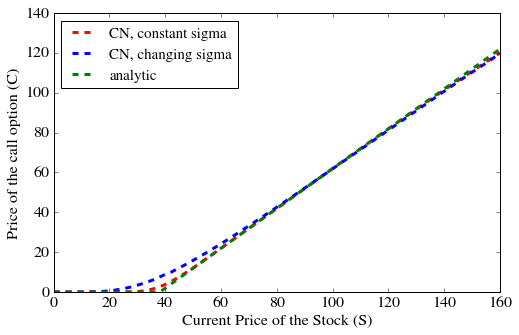

In [394]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(s,V_imp1,color='red', ls='--', lw=3, label='CN, constant sigma')
pyplot.plot(s,V_imp2,color='blue', ls='--', lw=3, label='CN, changing sigma')
pyplot.plot(s,C_exact,color='green', ls='--', lw=3, label='analytic')
pyplot.xlabel('Current Price of the Stock (S)')
pyplot.ylabel('Price of the call option (C)')
pyplot.legend(loc='upper left',prop={'size':15});

In [ ]:
from scipy.stats import norm

In [393]:
sigma = 0.25
C_exact = np.zeros(M+1)
C_exact = s * norm.cdf((np.log1p(s/K) + (r+0.5*sigma**2)*T) / (sigma * np.sqrt(T))) - K*np.exp(-r*T) * norm.cdf((np.log1p(s/K) + (r+0.5*sigma**2)*T) / (sigma * np.sqrt(T)) - (sigma * np.sqrt(T)))
C_exact = np.clip(C_exact, 0, np.inf)

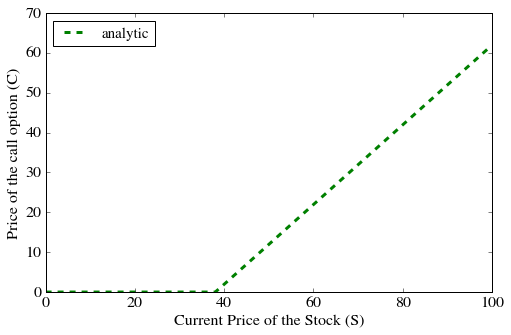

In [336]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(s,C_exact,color='green', ls='--', lw=3, label='analytic')

pyplot.xlabel('Current Price of the Stock (S)')
pyplot.ylabel('Price of the call option (C)')
pyplot.legend(loc='upper left',prop={'size':15});

C:\Users\croberts94\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


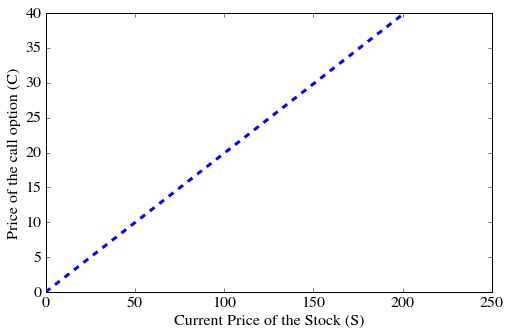

In [148]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,s,color='blue', ls='--', lw=3)
pyplot.xlabel('Current Price of the Stock (S)')
pyplot.ylabel('Price of the call option (C)')
pyplot.legend(loc='upper left',prop={'size':15});